In [ ]:
# Dataset unzip in the folder for processing (One time process) uncomment for unzip
# !unzip /content/drive/MyDrive/keypoint_detection/kaggle_facial_keypoint_dataset.zip -d /content/drive/MyDrive/keypoint_detection/


In [ ]:
# Drive mount one time
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Check if the file exists
# !ls
# !ls "/content/drive/MyDrive/keypoint_detection/"

In [ ]:
# datapath
# /content/drive/Mydrive/keypoint_detection/

# **Required libraries import**

In [ ]:
# imports
import os
import matplotlib.pyplot as plt
# from tqdm.notebook import tqdm
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
# from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split
import random
import pandas as pd
import csv

# Function to show images in the notebook
%matplotlib inline
print(tf.__version__) # tensorflow version check
print("GPU Available: ", tf.config.list_physical_devices('GPU')) # GPU availability check


2.15.0
GPU Available:  []


# **Data Directory paths**

In [ ]:
# dataset directories and loading dataset
labels_dir = "/content/drive/MyDrive/keypoint_detection/training.csv" # labels location
X_dir = "/content/drive/MyDrive/keypoint_detection/images/"   # image dirctory training and test images
train_image_dir = os.path.join(X_dir, "train_images") # train images
test_image_dir = os.path.join(X_dir, "test_images") #test images

print(train_image_dir)
print(test_image_dir)
print(labels_dir)

/content/drive/MyDrive/keypoint_detection/images/train_images
/content/drive/MyDrive/keypoint_detection/images/test_images
/content/drive/MyDrive/keypoint_detection/training.csv


# **Data Analysis and visualization**

In [ ]:
# Training labels loading
df_train_labels = pd.read_csv(labels_dir)
df_train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [ ]:
df_train_labels.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [ ]:
print('Total columns: ', len(df_train_labels.columns))
print('columns: ', (df_train_labels.columns))

Total columns:  30
columns:  Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')


# Single sample and selective keypoints visualization for validation and **mapping**

right_eye_center_x: 29.1835514019 right_eye_center_y: 37.563364486
left_eye_center_x: 69.6807476636 right_eye_center_y: 39.9687476636
mouth_left_corner_x: 64.8690841121 mouth_left_corner_y: 82.4711775701
mouth_right_corner_x: 31.9904299065 mouth_right_corner_y: 81.6690841121


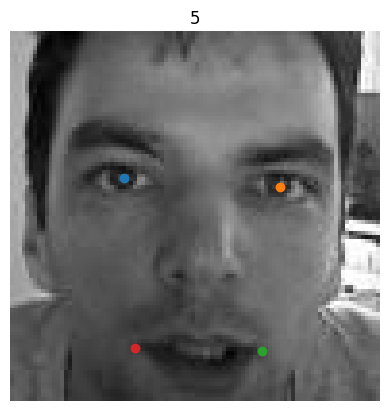

In [ ]:
# list of available files in the ordered sequence
files = os.listdir(train_image_dir)
files.sort(key=lambda x: int(x.split('.')[0])) # sorting files in a sequence
# print(files)

# checking the sequence of the images
# i=0
# for file in files:
#   if i<=50:
#     print(file)
#   else:
#     break
#   i+=1

# read images from the directory select image number to display
image_number = 5
sample_image = os.path.join(train_image_dir,files[image_number])
read_img= plt.imread(sample_image)
plt.imshow(read_img)
plt.axis('off')
plt.title(image_number)
plt.scatter(df_train_labels['right_eye_center_x'][image_number], df_train_labels['right_eye_center_y'][image_number])
plt.scatter(df_train_labels['left_eye_center_x'][image_number], df_train_labels['left_eye_center_y'][image_number])
plt.scatter(df_train_labels['mouth_left_corner_x'][image_number], df_train_labels['mouth_left_corner_y'][image_number])
plt.scatter(df_train_labels['mouth_right_corner_x'][image_number], df_train_labels['mouth_right_corner_y'][image_number])

print('right_eye_center_x:', df_train_labels['right_eye_center_x'][image_number], 'right_eye_center_y:', df_train_labels['right_eye_center_y'][image_number])
print('left_eye_center_x:', df_train_labels['left_eye_center_x'][image_number], 'right_eye_center_y:', df_train_labels['left_eye_center_y'][image_number])
print('mouth_left_corner_x:',df_train_labels['mouth_left_corner_x'][image_number], 'mouth_left_corner_y:',df_train_labels['mouth_left_corner_y'][image_number])
print('mouth_right_corner_x:', df_train_labels['mouth_right_corner_x'][image_number], 'mouth_right_corner_y:',df_train_labels['mouth_right_corner_y'][image_number])

# **Random sample Visualization for validation of the dataset**

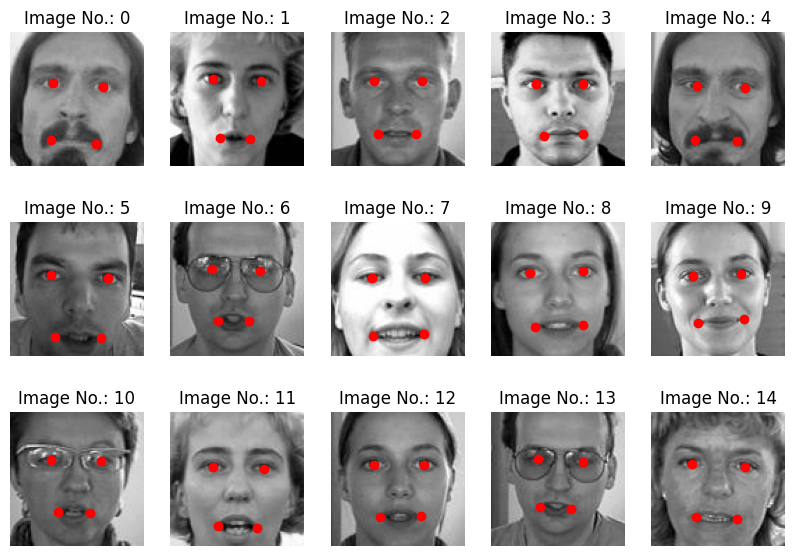

In [ ]:
# subplot for sample images and labels ovelapped keypoints

import matplotlib.pyplot as plt

# the number of images to display (row*column = number of images for display)
row = 3
column = 5

# figure subplot
fig, axes = plt.subplots(row, column, figsize=(10, 7))

# Iterate through the first (row*coulumn = no.of images) (3*5 = 15 )images
for i in range(row*column):
  # Get the image filename
  filename = os.path.join(train_image_dir, files[i])

  # Read the image
  image = plt.imread(filename)

  # Select the current subplot
  ax = axes[i // column, i % column]

  #Turn off the axis
  ax.set_axis_off()

  # Display the image
  ax.imshow(image)

  # Plot the keypoints (the keypoints can be changed this is just sample validation)
  ax.scatter(df_train_labels['right_eye_center_x'][i], df_train_labels['right_eye_center_y'][i], color='red')
  ax.scatter(df_train_labels['left_eye_center_x'][i], df_train_labels['left_eye_center_y'][i], color='red')
  ax.scatter(df_train_labels['mouth_left_corner_x'][i], df_train_labels['mouth_left_corner_y'][i], color='red')
  ax.scatter(df_train_labels['mouth_right_corner_x'][i], df_train_labels['mouth_right_corner_y'][i], color='red')

  # Add title to the image
  ax.set_title("Image No.: "+ files[i].split('.')[0])

# Show the plot
plt.show()


# **Validation of the image sizes availble in the dataset**

In [ ]:
# image dimensions dictionary to verify the dimensions of each sample
image_shape_dict =dict()
for file in files:
  filename = os.path.join(train_image_dir, file)
  # print(file)
  img= plt.imread(filename)
  # print(img.shape)
  image_shape_dict[file.split('.')[0]] = img.shape


print(image_shape_dict)

{'0': (96, 96, 3), '1': (96, 96, 3), '2': (96, 96, 3), '3': (96, 96, 3), '4': (96, 96, 3), '5': (96, 96, 3), '6': (96, 96, 3), '7': (96, 96, 3), '8': (96, 96, 3), '9': (96, 96, 3), '10': (96, 96, 3), '11': (96, 96, 3), '12': (96, 96, 3), '13': (96, 96, 3), '14': (96, 96, 3), '15': (96, 96, 3), '16': (96, 96, 3), '17': (96, 96, 3), '18': (96, 96, 3), '19': (96, 96, 3), '20': (96, 96, 3), '21': (96, 96, 3), '22': (96, 96, 3), '23': (96, 96, 3), '24': (96, 96, 3), '25': (96, 96, 3), '26': (96, 96, 3), '27': (96, 96, 3), '28': (96, 96, 3), '29': (96, 96, 3), '30': (96, 96, 3), '31': (96, 96, 3), '32': (96, 96, 3), '33': (96, 96, 3), '34': (96, 96, 3), '35': (96, 96, 3), '36': (96, 96, 3), '37': (96, 96, 3), '38': (96, 96, 3), '39': (96, 96, 3), '40': (96, 96, 3), '41': (96, 96, 3), '42': (96, 96, 3), '43': (96, 96, 3), '44': (96, 96, 3), '45': (96, 96, 3), '46': (96, 96, 3), '47': (96, 96, 3), '48': (96, 96, 3), '49': (96, 96, 3), '50': (96, 96, 3), '51': (96, 96, 3), '52': (96, 96, 3), '5

# **Checking for the unique dimensions of te images for processing**

In [ ]:
# Unique dimensions in the input images (helpful to resize the dataset)
def unique_dimensions(list1):
    # initialize a null list for storing unique dimesions
    unique_list = []
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print (x)

unique_dimensions(list(image_shape_dict.values()))

(96, 96, 3)


In [ ]:
print(image_shape_dict)
print(list(image_shape_dict.keys()))
print(list(image_shape_dict.values()))


{'0': (96, 96, 3), '1': (96, 96, 3), '2': (96, 96, 3), '3': (96, 96, 3), '4': (96, 96, 3), '5': (96, 96, 3), '6': (96, 96, 3), '7': (96, 96, 3), '8': (96, 96, 3), '9': (96, 96, 3), '10': (96, 96, 3), '11': (96, 96, 3), '12': (96, 96, 3), '13': (96, 96, 3), '14': (96, 96, 3), '15': (96, 96, 3), '16': (96, 96, 3), '17': (96, 96, 3), '18': (96, 96, 3), '19': (96, 96, 3), '20': (96, 96, 3), '21': (96, 96, 3), '22': (96, 96, 3), '23': (96, 96, 3), '24': (96, 96, 3), '25': (96, 96, 3), '26': (96, 96, 3), '27': (96, 96, 3), '28': (96, 96, 3), '29': (96, 96, 3), '30': (96, 96, 3), '31': (96, 96, 3), '32': (96, 96, 3), '33': (96, 96, 3), '34': (96, 96, 3), '35': (96, 96, 3), '36': (96, 96, 3), '37': (96, 96, 3), '38': (96, 96, 3), '39': (96, 96, 3), '40': (96, 96, 3), '41': (96, 96, 3), '42': (96, 96, 3), '43': (96, 96, 3), '44': (96, 96, 3), '45': (96, 96, 3), '46': (96, 96, 3), '47': (96, 96, 3), '48': (96, 96, 3), '49': (96, 96, 3), '50': (96, 96, 3), '51': (96, 96, 3), '52': (96, 96, 3), '5

# **Checking for Null values in the dataset**

In [ ]:
# Process the train labels for missing values of the keypoints
df_train_labels.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

# **Handling missing values in the dataset and saving the modified keypoints**

In [ ]:
#  Fill the missing values using Forward fill method.
# It propagates the last valid observation forward to fill the missing values.
df_train_labels.fillna(method='ffill', inplace=True)
df_train_labels.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
dtype: int64

In [ ]:
# save the new training_labels in csv to the drive for future usage
path_save= "/content/drive/MyDrive/keypoint_detection/"
df_train_labels.to_csv(os.path.join(path_save,'processed_training_labels.csv'), index=False)

# **Preparing data for model building**

In [ ]:
# imports
import os
import matplotlib.pyplot as plt
# from tqdm.notebook import tqdm
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
# from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split
import random
import pandas as pd
import csv

# Function to show images in the notebook
%matplotlib inline
print(tf.__version__) # tensorflow version check
print("GPU Available: ", tf.config.list_physical_devices('GPU')) # GPU availability check


In [ ]:
# list of available files in the ordered sequence
files = os.listdir(train_image_dir)
files.sort(key=lambda x: int(x.split('.')[0])) # sorting files in a sequence
# print(files)

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import cv2  # OpenCV
import numpy as np

# Function to load images and keypoints from a directory
def load_images_and_keypoints(directory_path, csv_file_path):
    image_data = []
    keypoints_data = []

    # Load CSV file with keypoints information
    keypoints_df = pd.read_csv(csv_file_path)
    files = os.listdir(directory_path)
    files.sort(key=lambda x: int(x.split('.')[0])) # sorting files in a sequence
    # print (files)

    for filename in files:
        if filename.endswith(".jpg"):  # Adjust the file extension based on your image format
            img_path = os.path.join(directory_path, filename)
            img = cv2.imread(img_path)  # Use cv2.imread() for OpenCV or PIL.Image.open() for Pillow
            # print(img.shape)
            img = cv2.resize(img, (96, 96))  # Adjust the size as needed
            image_data.append(img)

            # Extract keypoints for the current image
            # keypoints_info = keypoints_df[keypoints_df['filename'] == filename]
            row =int(filename.split('.')[0])
            # print('row:', row)
            keypoints = keypoints_df.iloc[row, :].values  # Assuming columns 0 and onwards are x, y coordinates
            keypoints_data.append(keypoints)

    return np.array(image_data), np.array(keypoints_data)



In [ ]:
# Directory containing images
image_directory ="/content/drive/MyDrive/keypoint_detection/images/train_images/" # train images

# CSV file containing keypoints information
csv_file_path = "/content/drive/MyDrive/keypoint_detection/processed_training_labels.csv"

# Load images and keypoints
image_data, keypoints_data = load_images_and_keypoints(image_directory, csv_file_path)

(7049, 96, 96, 3) (7049, 30)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[66.93831111 43.42450963 31.09605926 39.52860444 59.25534694 36.06514286
 73.94269388 34.62465306 37.47853061 39.39804082 22.05681633 40.33012245
 53.29978747 29.98765747 80.94778747 27.97753502 38.77929767 33.30259624
 14.79888951 35.98275951 47.06925037 73.03333926 72.60043255 71.86204134
 34.23275908 77.3394291  51.59945296 75.96359236 45.90048    82.7730963 ]


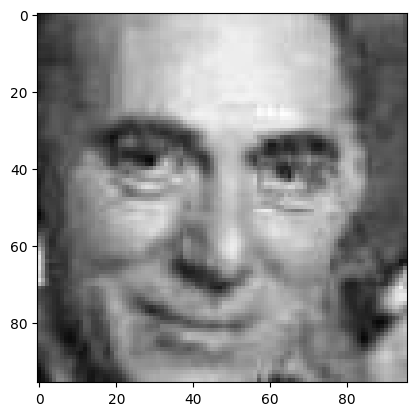

In [ ]:
# Validation of the images and corresponding keypoints
print(image_data.shape, keypoints_data.shape)
print(type(image_data), type(keypoints_data))
print(keypoints_data[7048, :])
plt.imshow(image_data[7048,:,:,:].reshape(96, 96, 3))

[65.23018868 34.34264151 28.80271698 33.93781132 58.75381132 35.55713208
 70.08633962 35.55713208 34.46943396 35.15230189 24.35049057 35.55713208
 53.89675472 28.27109434 76.15788679 28.27109434 38.51683019 26.24784906
 16.6605283  27.86716981 47.42128302 51.74671698 57.13449057 71.57977358
 34.06460377 70.77011321 46.46943396 65.26007547 46.20679245 81.69781132]


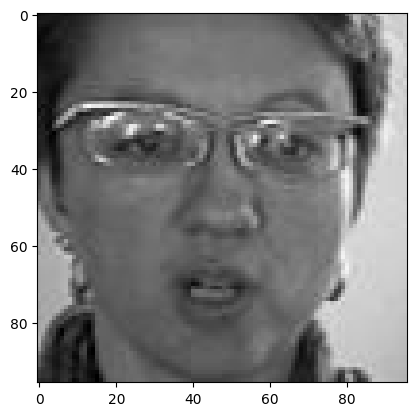

In [ ]:
# Validation of the images and corresponding keypoints
print(keypoints_data[10, :])
plt.imshow(image_data[10,:,:,:].reshape(96, 96, 3))

In [ ]:
# splitting the dataset into train validation and test (train = 0.8, validation  = 0.1, test = 0.1)

# Split the data into training, validation, and testing sets
train_data, temp_data, train_keypoints, temp_keypoints = train_test_split(
    image_data, keypoints_data, test_size=0.2, random_state=42
)

# Further split the remaining data into validation and test sets
validation_data, test_data, validation_keypoints, test_keypoints = train_test_split(
    temp_data, temp_keypoints, test_size=0.5, random_state=42
)

# se train_data, validation_data, and test_data along with
# train_keypoints, validation_keypoints, and test_keypoints to train,
# validate, and test your neural network.

In [ ]:
print(train_data.shape, validation_data.shape, test_data.shape)
print(train_keypoints.shape, validation_keypoints.shape, test_keypoints.shape)

(5639, 96, 96, 3) (705, 96, 96, 3) (705, 96, 96, 3)
(5639, 30) (705, 30) (705, 30)
